# Import plaintext

In [1]:
import csv
import numpy as np
pt = []
with open('../../Downloads/difftraces_0909_8p/vectors.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        pt.append(row['input'])
        #print(row['input'], row['output'])

In [2]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))
pt_array[0]

500
16


array([  0,   5, 125,  57, 202,  37, 179, 180, 221, 237, 118, 203, 167,
        73,  99, 151], dtype=uint8)

# Import key

In [3]:
import csv
import numpy as np
key = []
with open('../../Downloads/difftraces_0909_8p/vectors.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        key = row['key']

In [4]:
key

'00112233445566778899aabbccddeeff'

In [5]:
key_array = []
b = bytes.fromhex(key)
one_array = np.frombuffer(b,dtype=np.uint8)
key_array = one_array
#key_array.append(one_array)
key_array

array([  0,  17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187, 204,
       221, 238, 255], dtype=uint8)

# Import traces

In [6]:
import glob
import matplotlib.pylab as plt
NumofTraces = 500
str_trace = []

Downloads scate_picoaes_ckey_1k joules reports reports_picoaes_sky130_50gate
path = "../../Downloads/difftraces_0909_8p/fullpower/*.txt"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-18:]):
    #print(filename)
    with open(filename, 'r') as f:
        lines = f.readlines()
        str_trace.append(lines)

In [8]:
trace_array_y = []
for i in range (len(str_trace)):
    b = [float(x) for x in str_trace[i]]
    trace_array_y.append(b)

Text(0.5, 1.0, 'COAES PICO JOULES FULL POWER Plot')

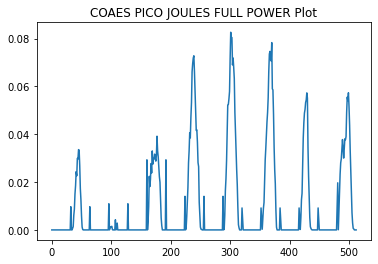

In [9]:
plt.plot(trace_array_y[0])
plt.title('COAES PICO JOULES FULL POWER Plot')
#plt.savefig('trace.jpg',dpi=100) # save jpg/png

In [10]:
trace_array_y = np.array(trace_array_y)

In [11]:
print(len(key_array))
print(len(pt_array))
print(len(pt_array[0]))
print(len(trace_array_y))
print(len(trace_array_y[0]))

16
500
16
500
513


# SBox

In [12]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [13]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

key_guess = []
full_cpa_list = []
known_key = key_array

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
                st1 = pt_array[tnum][bnum] ^ kguess
                st2 = sbox[st1]
                hyp[tnum] = HW[st1 ^ st2]
                #hyp[tnum] = st1 ^ st2

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely A6 (actual 00)
 Top 5 guesses: 
   A6 - Diff = 0.662744
   0E - Diff = 0.658948
   41 - Diff = 0.607734
   D6 - Diff = 0.600441
   23 - Diff = 0.596710




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 11 (actual 11)
 Top 5 guesses: 
   11 - Diff = 0.211574
   B2 - Diff = 0.206293
   24 - Diff = 0.198783
   7D - Diff = 0.189276
   E7 - Diff = 0.187243




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 22 (actual 22)
 Top 5 guesses: 
   22 - Diff = 0.224362
   89 - Diff = 0.221213
   82 - Diff = 0.189573
   58 - Diff = 0.188279
   4F - Diff = 0.181240




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 2C (actual 33)
 Top 5 guesses: 
   2C - Diff = 0.204530
   32 - Diff = 0.200829
   DD - Diff = 0.196594
   B1 - Diff = 0.193104
   8C - Diff = 0.188098




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 55 (actual 44)
 Top 5 guesses: 
   55 - Diff = 0.239721
   44 - Diff = 0.225579
   54 - Diff = 0.199219
   F9 - Diff = 0.198039
   BB - Diff = 0.191030




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 41 (actual 55)
 Top 5 guesses: 
   41 - Diff = 0.231769
   86 - Diff = 0.212626
   77 - Diff = 0.212364
   7D - Diff = 0.205054
   1B - Diff = 0.203791




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely A6 (actual 66)
 Top 5 guesses: 
   A6 - Diff = 0.217875
   DD - Diff = 0.208901
   7D - Diff = 0.188216
   66 - Diff = 0.186885
   A8 - Diff = 0.184614




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 77 (actual 77)
 Top 5 guesses: 
   77 - Diff = 0.199192
   01 - Diff = 0.193337
   42 - Diff = 0.177096
   C8 - Diff = 0.176895
   E9 - Diff = 0.176602




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely F5 (actual 88)
 Top 5 guesses: 
   F5 - Diff = 0.191983
   95 - Diff = 0.189041
   01 - Diff = 0.185265
   8D - Diff = 0.184555
   8F - Diff = 0.180434




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 5F (actual 99)
 Top 5 guesses: 
   5F - Diff = 0.193531
   4B - Diff = 0.192764
   99 - Diff = 0.187146
   BC - Diff = 0.183051
   EC - Diff = 0.179076




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely 53 (actual AA)
 Top 5 guesses: 
   53 - Diff = 0.189177
   BC - Diff = 0.189164
   71 - Diff = 0.178180
   E3 - Diff = 0.177180
   18 - Diff = 0.176974




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely 93 (actual BB)
 Top 5 guesses: 
   93 - Diff = 0.208920
   71 - Diff = 0.194485
   DE - Diff = 0.182674
   B9 - Diff = 0.178416
   0B - Diff = 0.178276




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely CC (actual CC)
 Top 5 guesses: 
   CC - Diff = 0.227421
   EC - Diff = 0.212678
   58 - Diff = 0.205367
   9B - Diff = 0.197409
   78 - Diff = 0.196463




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely BA (actual DD)
 Top 5 guesses: 
   BA - Diff = 0.226644
   DD - Diff = 0.189728
   7E - Diff = 0.185257
   D1 - Diff = 0.183931
   72 - Diff = 0.183172




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely EE (actual EE)
 Top 5 guesses: 
   EE - Diff = 0.225307
   9F - Diff = 0.209834
   71 - Diff = 0.198698
   20 - Diff = 0.196111
   2A - Diff = 0.192744




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 18 (actual FF)
 Top 5 guesses: 
   18 - Diff = 0.203215
   32 - Diff = 0.199148
   30 - Diff = 0.197970
   FF - Diff = 0.195028
   41 - Diff = 0.190332




In [19]:
max_list = []
for subkey in range (16):
    corr = abs(full_cpa_list[subkey][known_key[subkey]])
    ymax = corr.max()
    max_list.append(ymax)

In [21]:
np.array(max_list).tofile("fullpower_diff01_max_list.bin")

In [20]:
max_list

[0.4287968943432761,
 0.21157441492453666,
 0.2243620188212389,
 0.18189738358613355,
 0.22557908417535893,
 0.14007772502340363,
 0.18688536724063365,
 0.19919160542970912,
 0.14314143947164168,
 0.18714568671452755,
 0.17209205317061788,
 0.11382674173586586,
 0.22742109439114938,
 0.18972784873659762,
 0.22530697847717884,
 0.19502789534602882]

<Figure size 432x288 with 0 Axes>

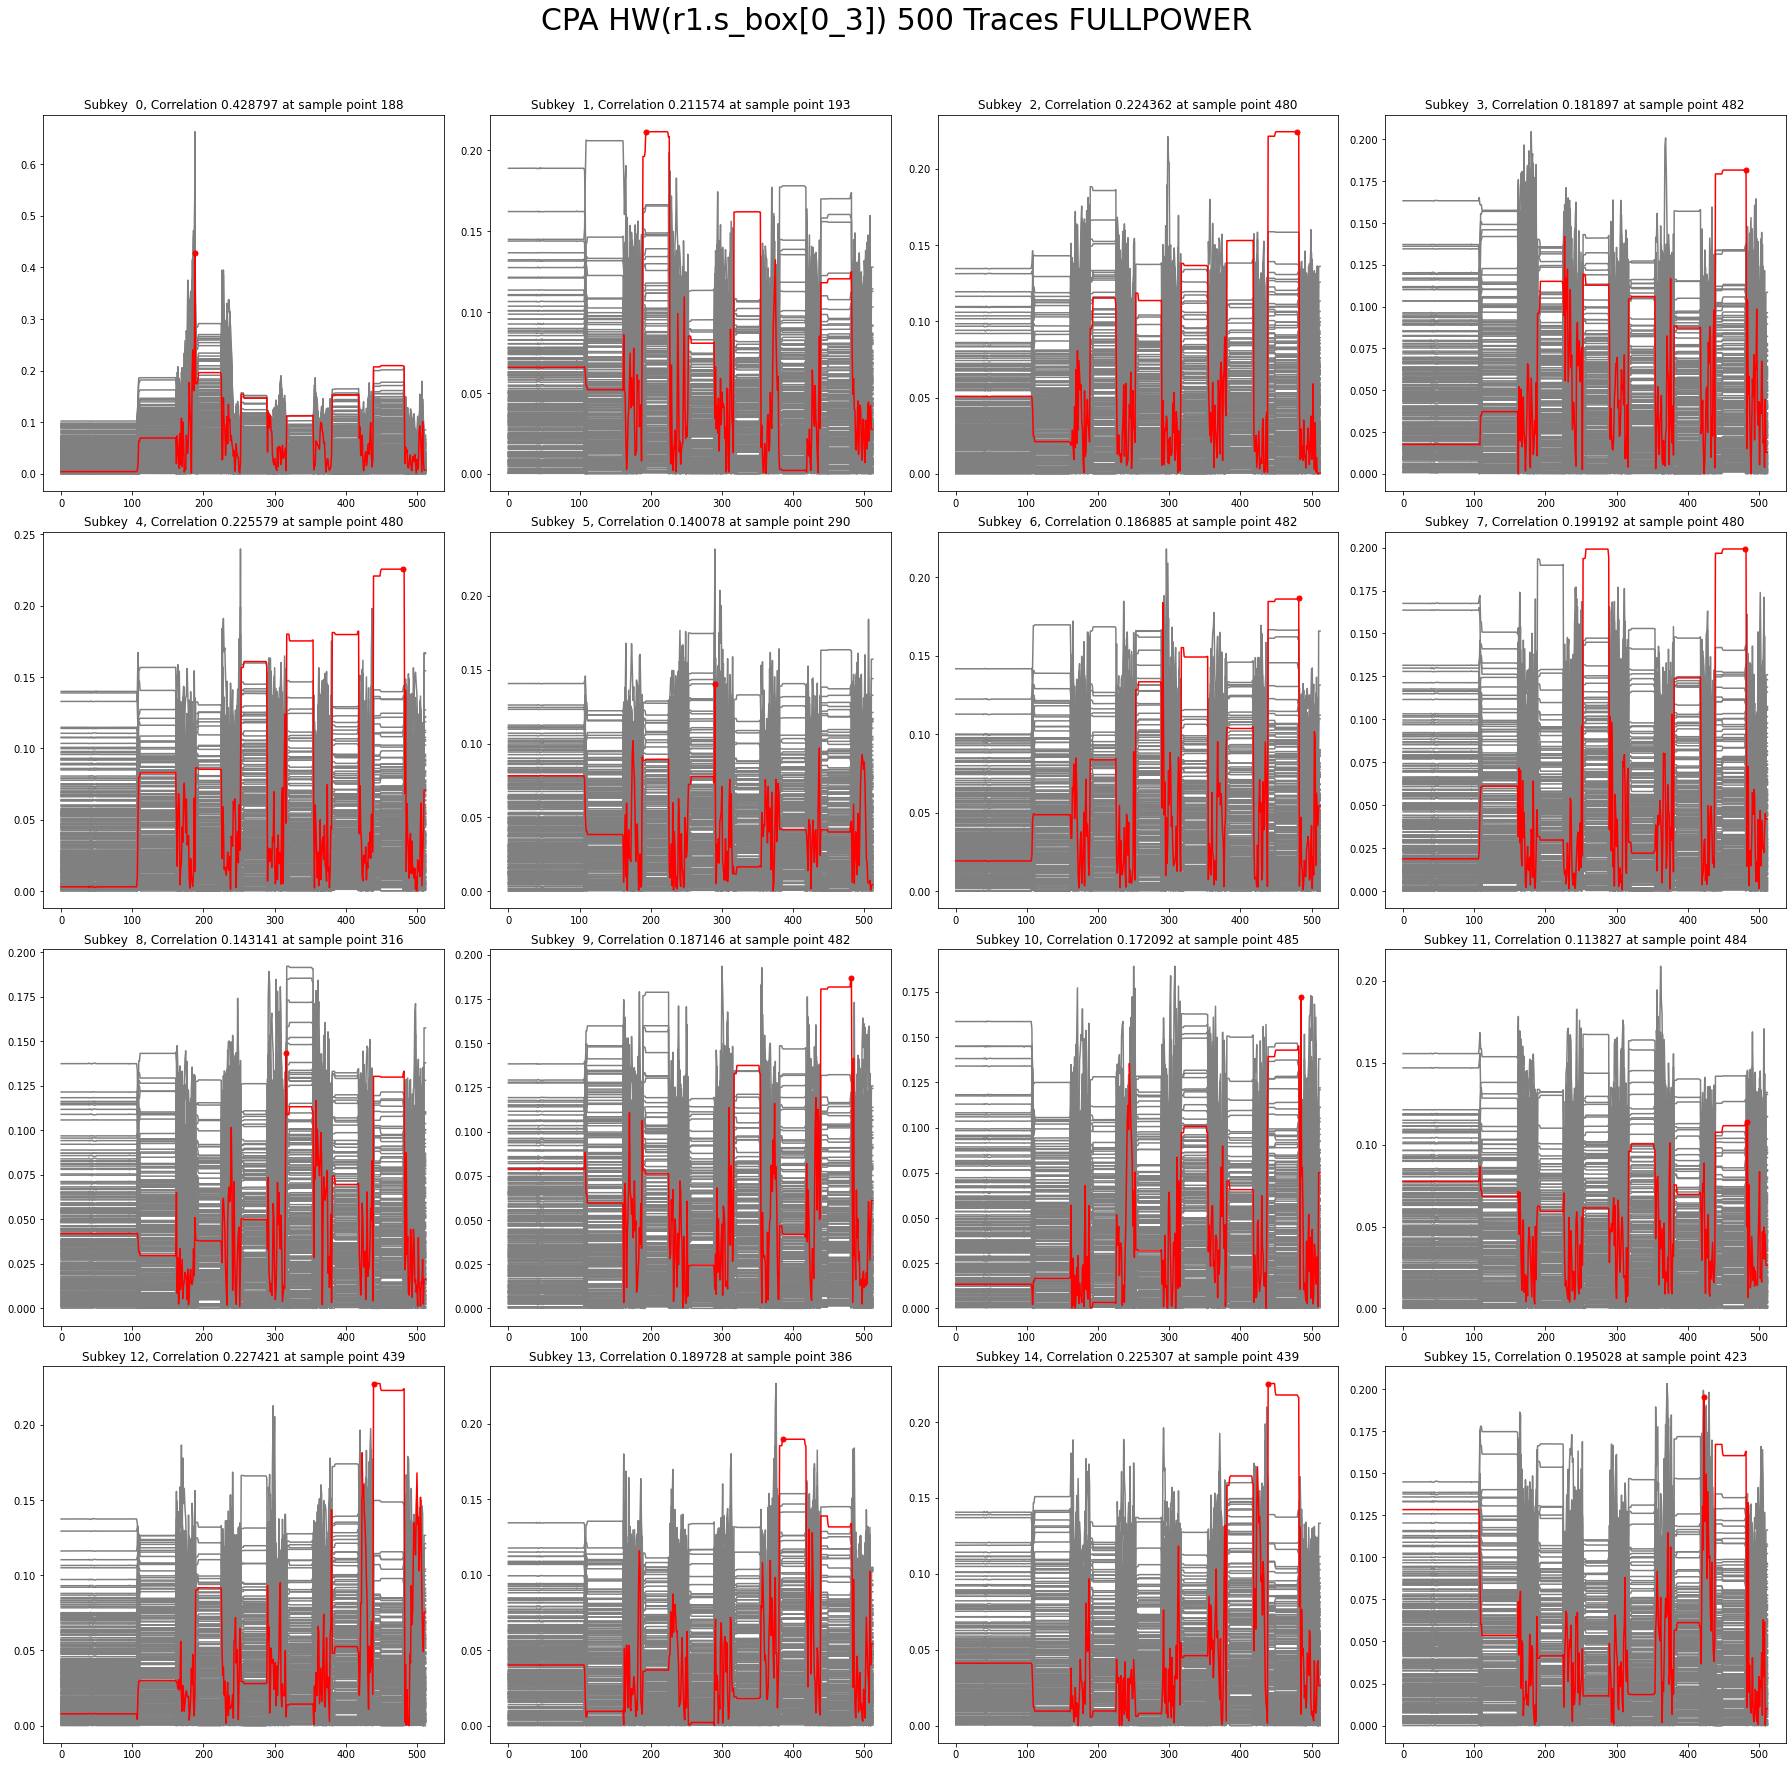

In [18]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
#####################################################
plt.suptitle('CPA HW(r1.s_box[0_3]) 500 Traces FULLPOWER',size=30)
#####################################################
plt.savefig('CPA HW(r1.s_box[0_3]) 500 Traces FULLPOWER.jpg',dpi=200)  


plt.show()

# How Many Traces Needed for Method 1

In [15]:
traces_enc_full = trace_array_y
print(len(traces_enc_full))
print(len(traces_enc_full[0]))

500
513


In [16]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [17]:
from tqdm.notebook import trange

full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

traces_enc = []
pt = []
known_key = key_array

for traces in trange(10,500,20): ## edit here
    #x = np.arange(5,515,15)  ###########3 edit the x here !!!!!
    x = np.arange(10,500,20)
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(pt_array[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    cpa_list = []
    for bnum in range(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                st1 = pt_array[tnum][bnum] ^ kguess
                st2 = sbox[st1]
                hyp[tnum] = st1 ^ st2
            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        sorted_args = np.argsort(maxcpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/25 [00:00<?, ?it/s]

<ipython-input-17-e0c733faf6c4>:54: RuntimeWarning: invalid value encountered in true_divide
  cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)


For 10 traces, correct key byte are  0


For 30 traces, correct key byte are  0


For 50 traces, correct key byte are  0


For 70 traces, correct key byte are  1


For 90 traces, correct key byte are  2


For 110 traces, correct key byte are  4


For 130 traces, correct key byte are  5


For 150 traces, correct key byte are  6


For 170 traces, correct key byte are  6


For 190 traces, correct key byte are  6


For 210 traces, correct key byte are  6


For 230 traces, correct key byte are  9


For 250 traces, correct key byte are  8


For 270 traces, correct key byte are 11


For 290 traces, correct key byte are 13


For 310 traces, correct key byte are 13


For 330 traces, correct key byte are 14


For 350 traces, correct key byte are 14


For 370 traces, correct key byte are 14


For 390 traces, correct key byte are 14


For 410 traces, correct key byte are 13


For 430 traces, correct key byte are 15


For 450 traces, correct key byte are 15


For 470 traces, correct key byte are 16

# CPA Number of traces vs. correctly guessed key bytes

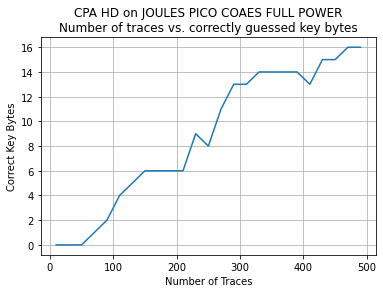

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# need to make adjustment here for600sample-Copy1 further experienments
# here x is 45 because we run 45 intervals of traces from 5 to 230 with incresing step of 5
### edit below
#x = np.arange(2,45,2) 
### edit above

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
############################################## edit here
plt.title('CPA HD on JOULES PICO COAES FULL POWER\nNumber of traces vs. correctly guessed key bytes')
plt.savefig('tracs_vs_bytes.jpg',dpi=100) # save jpg/png

# Plot for the correlation vs traces

In [19]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = full_cpa_list[i][subkey][guess] 
                ### edit above -- the list name need to be change for the especific name 
                ymax = np.nanmax(abs(corr))
                #print(ymax)
                max_correct.append(ymax)
            else:
                corr = full_cpa_list[i][subkey][guess]
                ymax = np.nanmax(abs(corr))
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

<ipython-input-19-09d11ef8ad17>:21: RuntimeWarning: All-NaN slice encountered
  ymax = np.nanmax(abs(corr))
<ipython-input-19-09d11ef8ad17>:26: RuntimeWarning: All-NaN slice encountered
  ymax = np.nanmax(abs(corr))


25
16
1
25
16
255


In [20]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [45]:
full_peak_corr = []
for i in range (16):
    full_peak_corr.append(corr_plot_full[i][last][0])

In [46]:
full_peak_corr

[0.5750061039450892,
 0.3069753025383828,
 0.27335284251573744,
 0.31864408579925896,
 0.24771975893194295,
 0.2926025892667577,
 0.31874759503987404,
 0.25863038735243676,
 0.31986648263721623,
 0.3957389617961829,
 0.33268011481068344,
 0.23489085563863388,
 0.27326708517132187,
 0.4018084588981903,
 0.2534466896093255,
 0.2675950400346094]

In [47]:
np.array(full_peak_corr).tofile("full_peak_corr.bin")

In [48]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

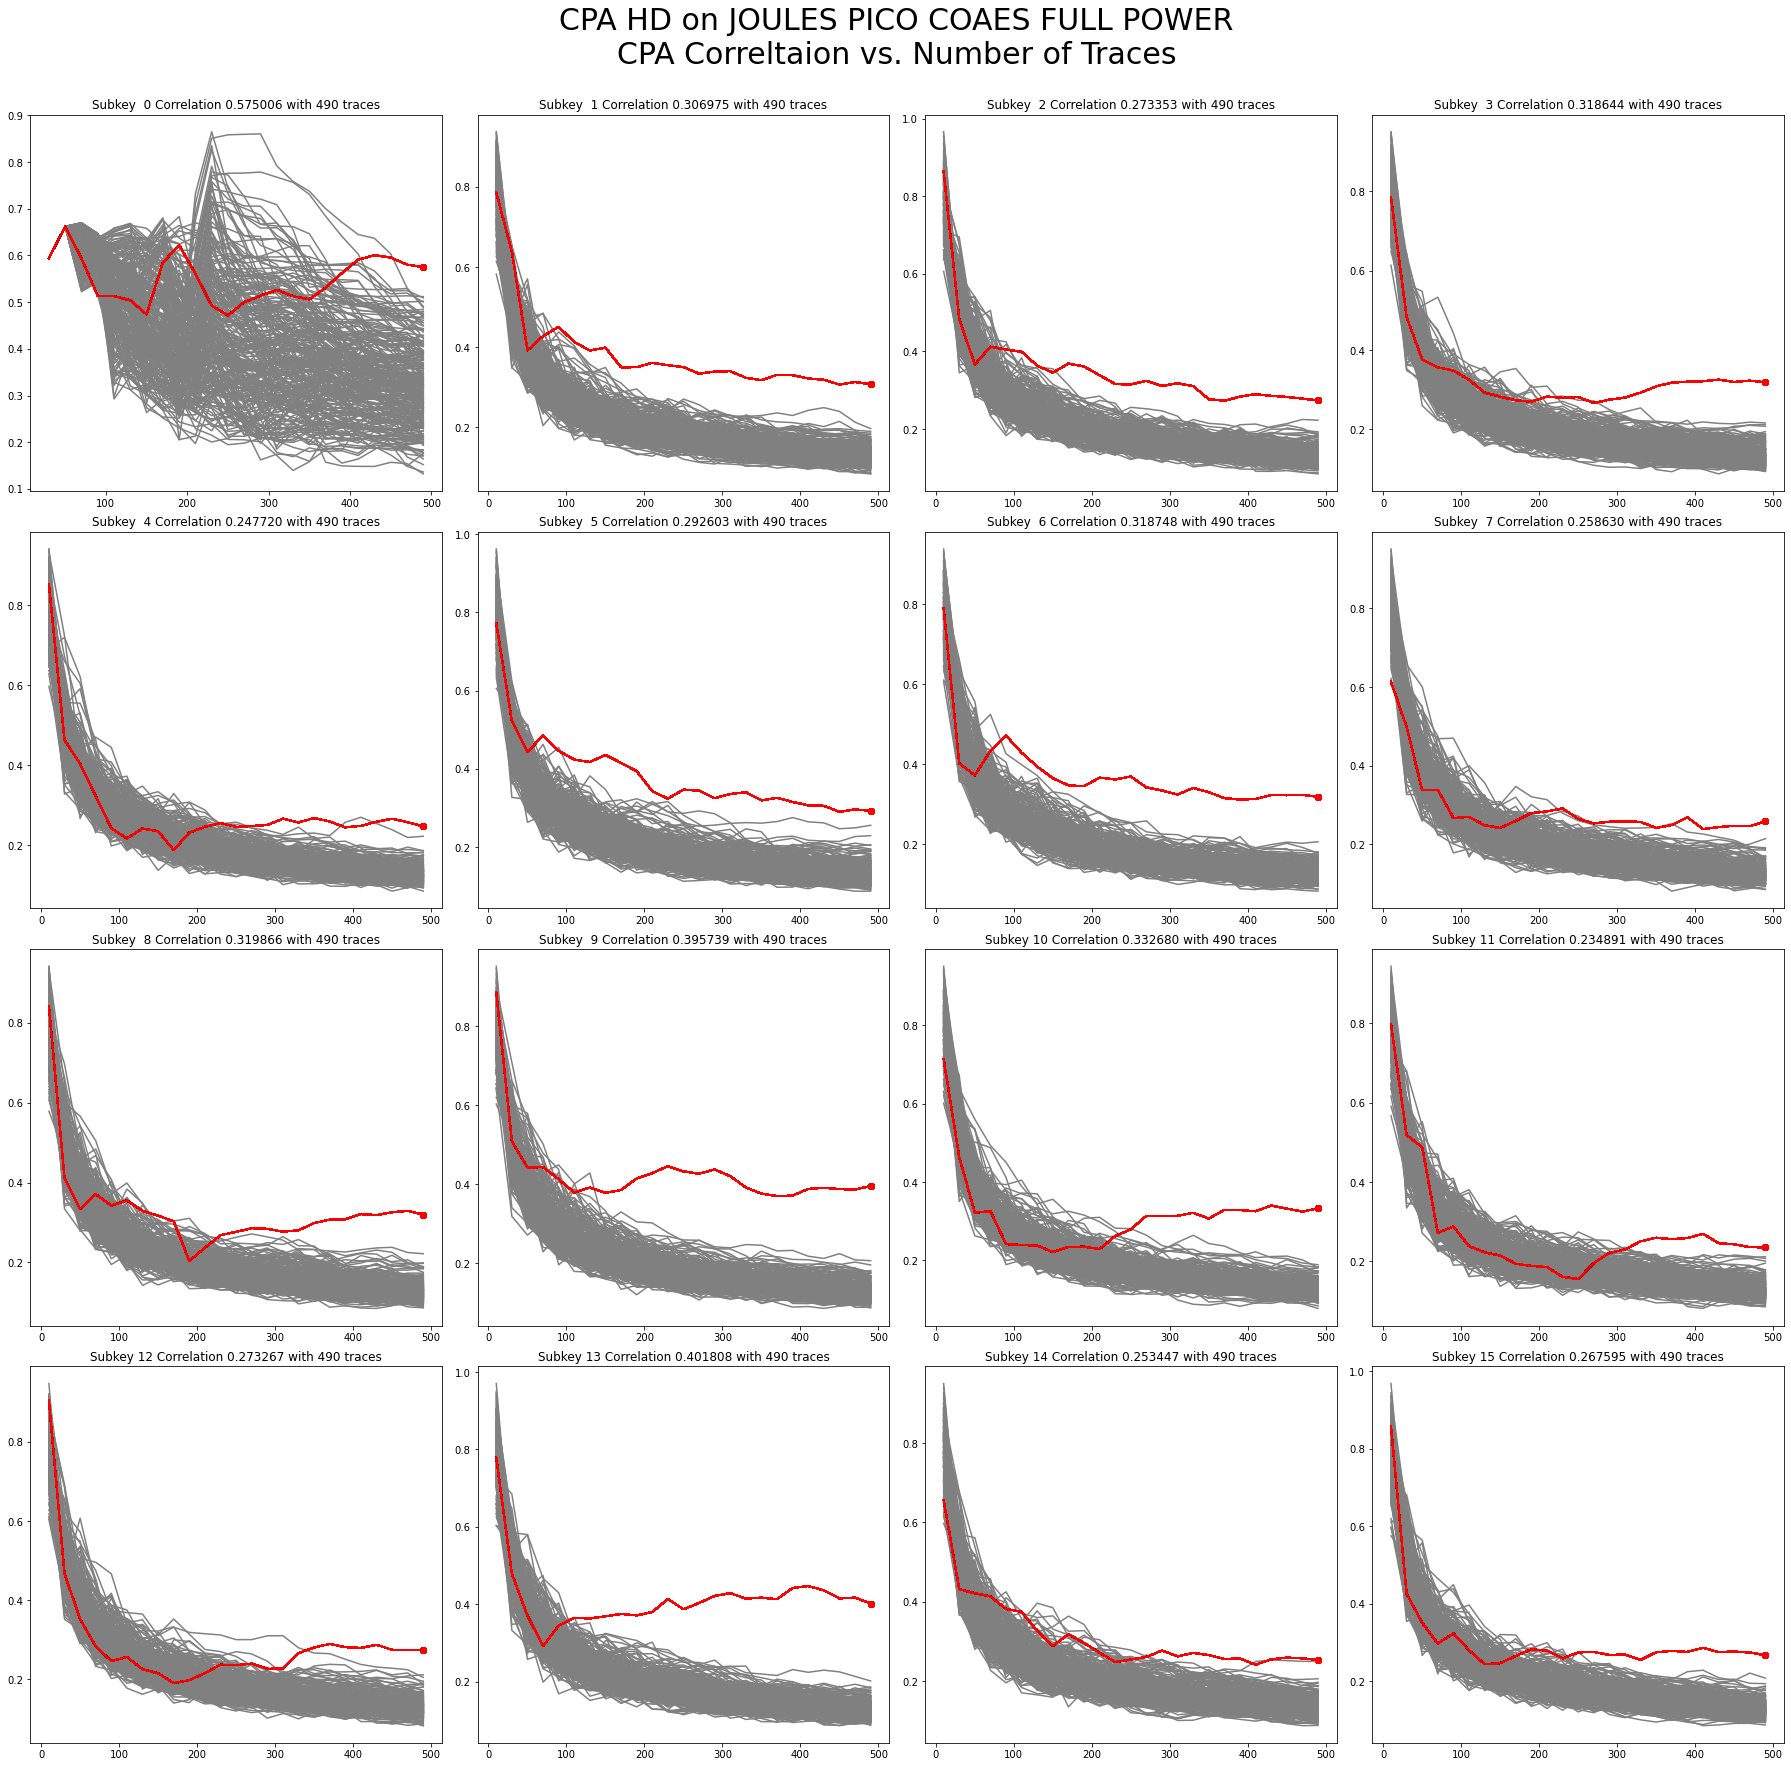

In [49]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        ### edit below, different experienment needs different xaxis
        #x = np.arange(5, 230, 5)  
        ### edit above
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        last = len(x)-1
        val = corr_plot_full[subkey][last][0]
        plt.title('Subkey %2d Correlation %2f with %2d traces' %(subkey,val,x[last]))
        plt.plot(x[last],val,marker='.', markersize=10, color="red",zorder=255)
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA HD on JOULES PICO COAES FULL POWER\nCPA Correltaion vs. Number of Traces', size=30)

plt.savefig('corr_vs_traces.jpg',dpi=200)  
            
plt.show()

<Figure size 432x288 with 0 Axes>

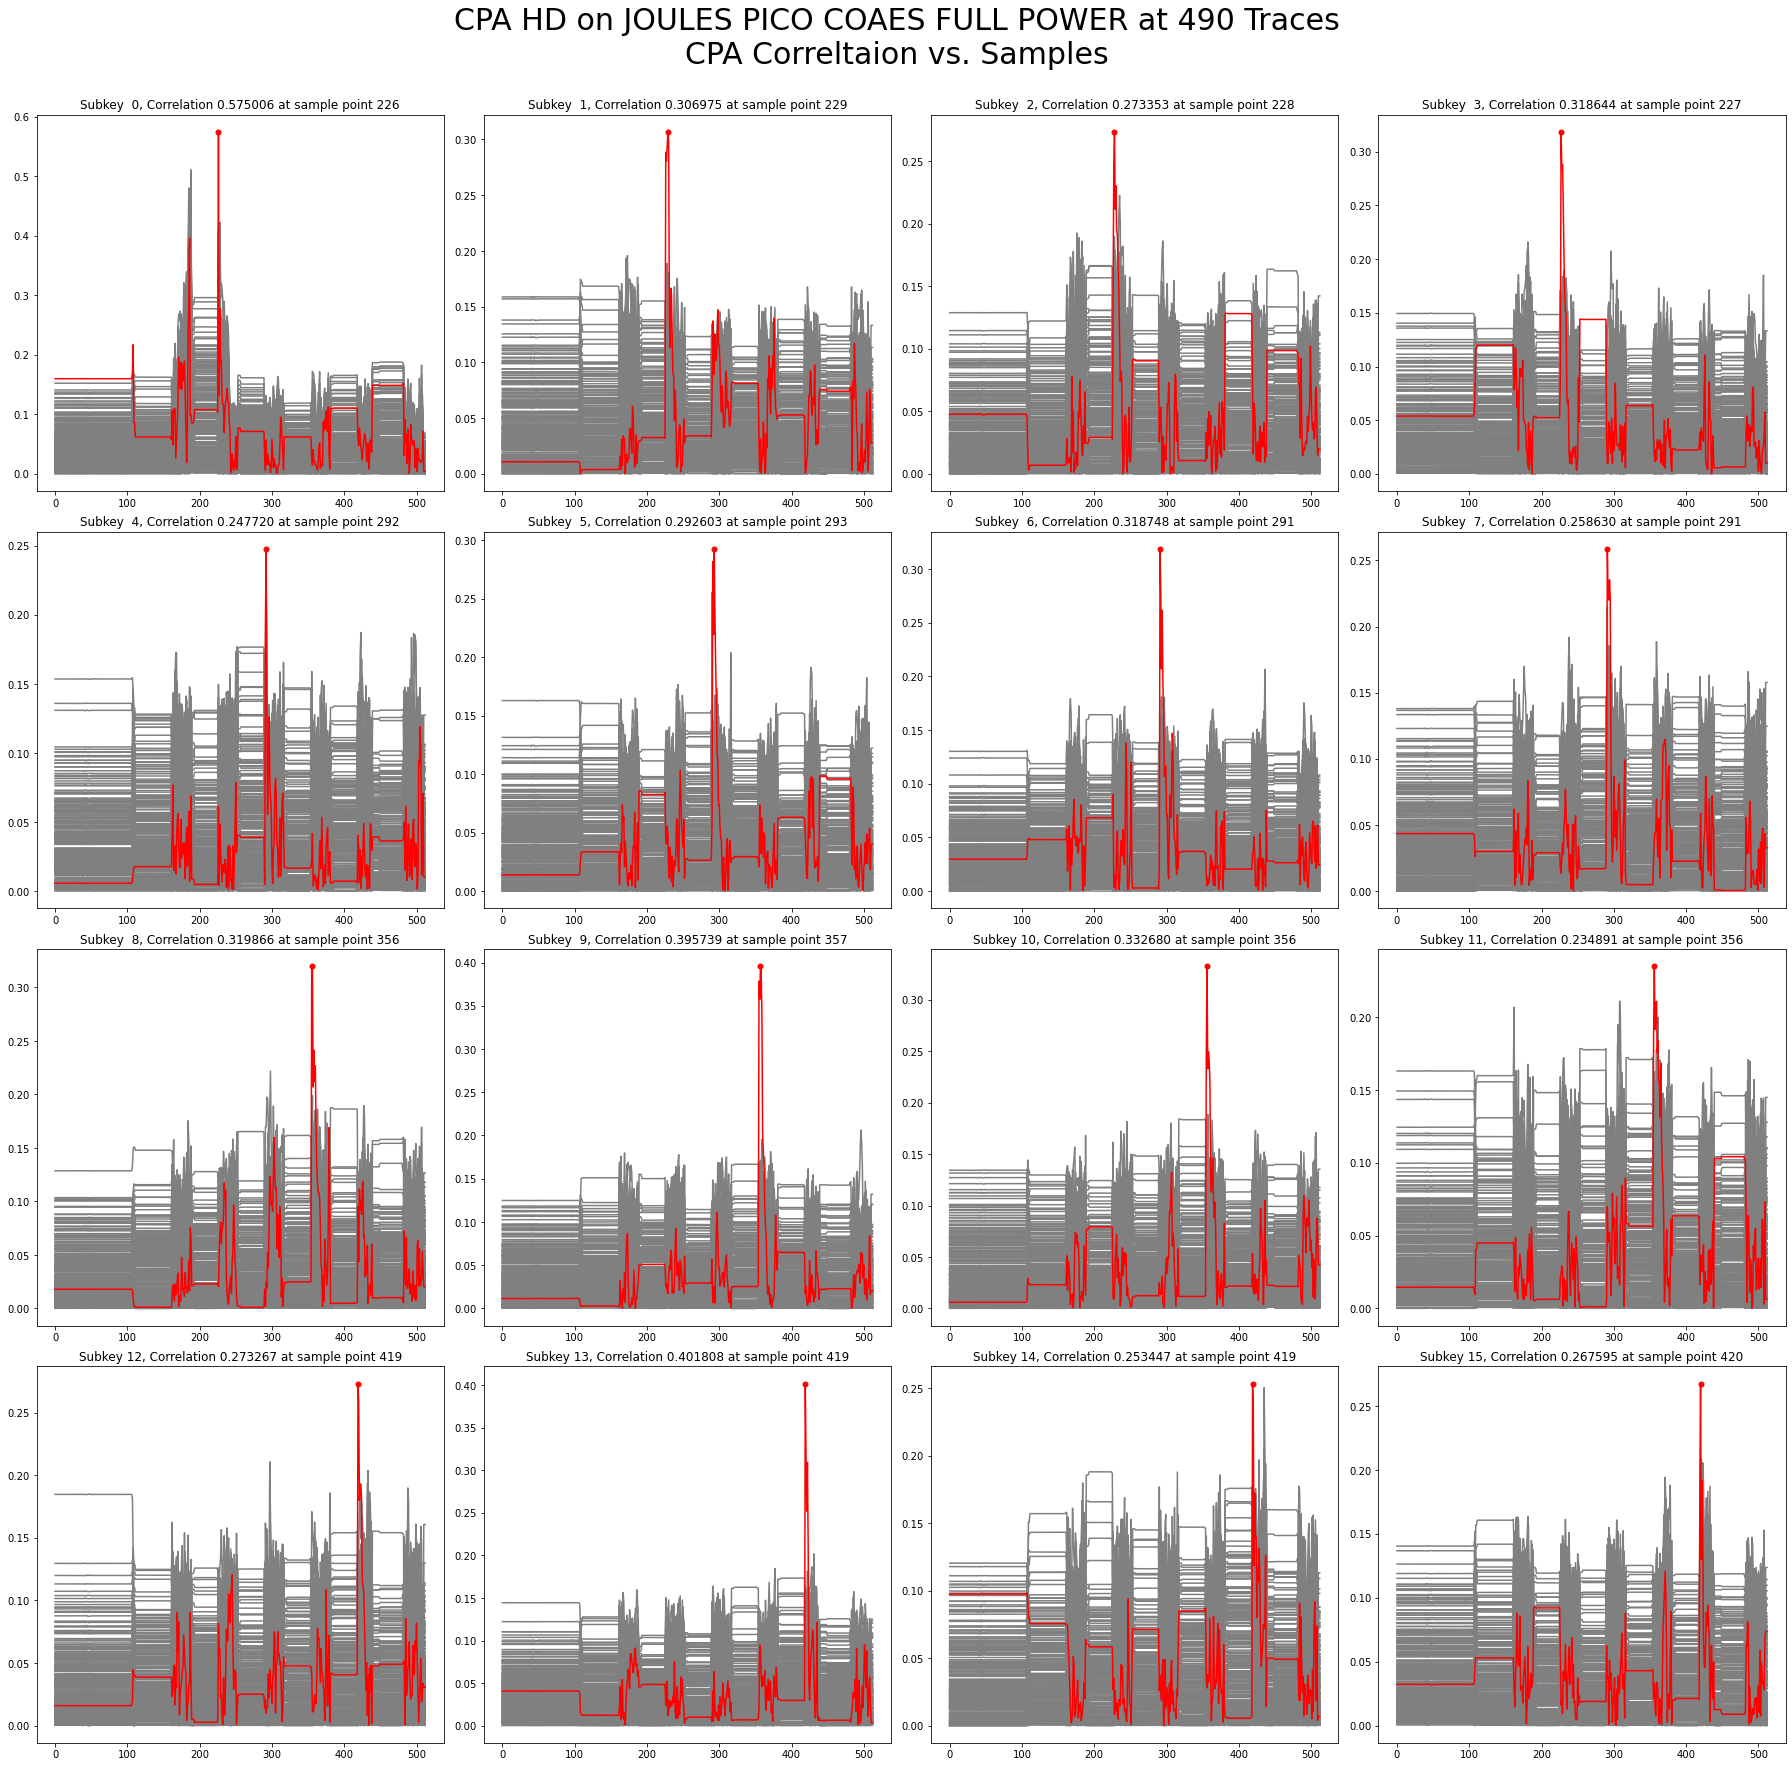

In [50]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
trial = last
tracesnumber = x[last]
for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[trial][subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[trial][subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[trial][subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = np.nanmax(abs(corr))
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
#####################################################
plt.suptitle('CPA HD on JOULES PICO COAES FULL POWER at %2d Traces\nCPA Correltaion vs. Samples'%(tracesnumber),size=30)
#####################################################
plt.savefig('corr_vs_samples_2.jpg',dpi=200)  


plt.show()